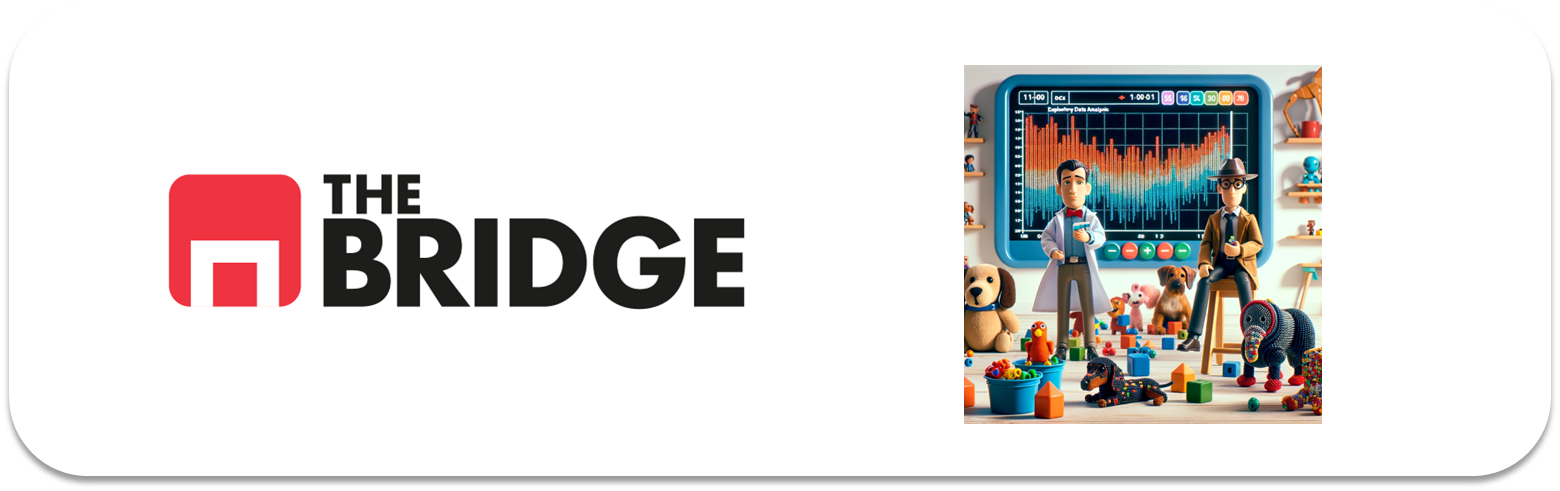

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()



def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()



def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()


def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [6]:
df_titanic = pd.read_csv("F:\\Bootcamp\\Online_Ds_Thebridge-Santi-Arias-\\titanic.csv")
df_titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [10]:
lista_columnas = ["deck","survived","pclass","embarked"]
df_titanic.drop(columns=lista_columnas, inplace=True)
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [21]:
df_titanic.drop(columns= "acompañantes", inplace = True)

df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,acompañantes_total
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [25]:
moda_de_embarke = df_titanic["embark_town"].mode()
df_titanic["embark_town"].fillna(moda_de_embarke)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [26]:
mean_age_by_group = df_titanic.groupby("who")["age"].transform("mean")

df_titanic["age"].fillna(mean_age_by_group, inplace=True)
print(df_titanic.isnull().sum())

sex                   0
age                   0
fare                  0
class                 0
who                   0
adult_male            0
embark_town           2
alive                 0
alone                 0
acompañantes_total    0
dtype: int64


C:\Users\samas\AppData\Local\Temp\ipykernel_22492\4254962980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(mean_age_by_group, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

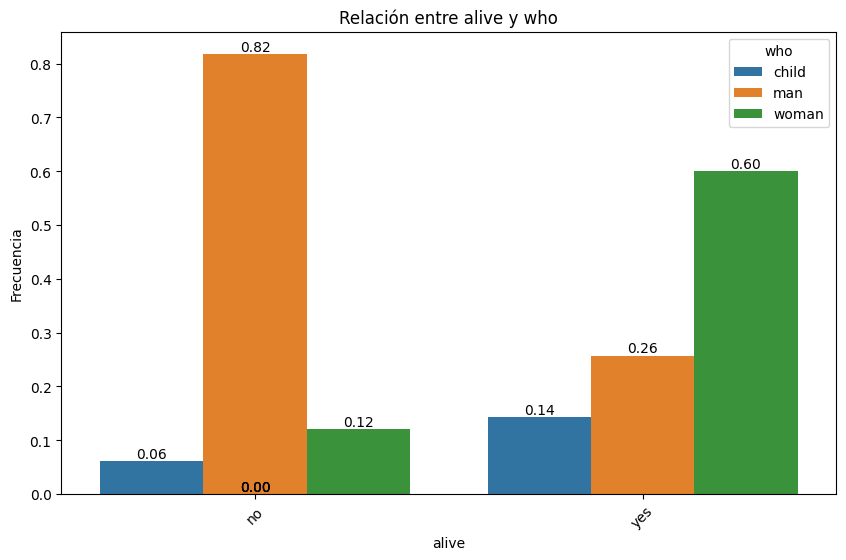

In [ ]:
#1 
plot_categorical_relationship_fin(df_titanic,"alive","who",relative_freq=True, show_values=True, size_group = 5)

Como podemos ver en el caso de la supervivencia por sexos los hombres murieron muchisimo mas las mujeres fueron las que mas sobrevivieron. Pero la tasa de supervivencia mas baja la tienen los niños.

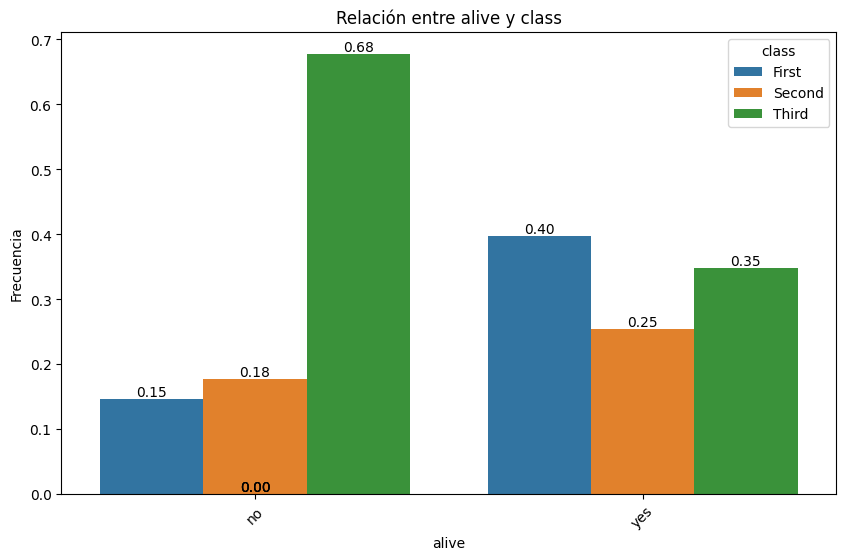

In [ ]:
#2
plot_categorical_relationship_fin(df_titanic,"alive","class",relative_freq=True, show_values=True, size_group = 5)

En cuanto a muertes la tercera clase presenta una gran dominancia, tiene senntido ya que primero se innundaron los camarotes de tercera classe que estaba abajo del barco. Pero llama la atencion que ratio de supervivencia si que esta igualado entre las 3 classes.

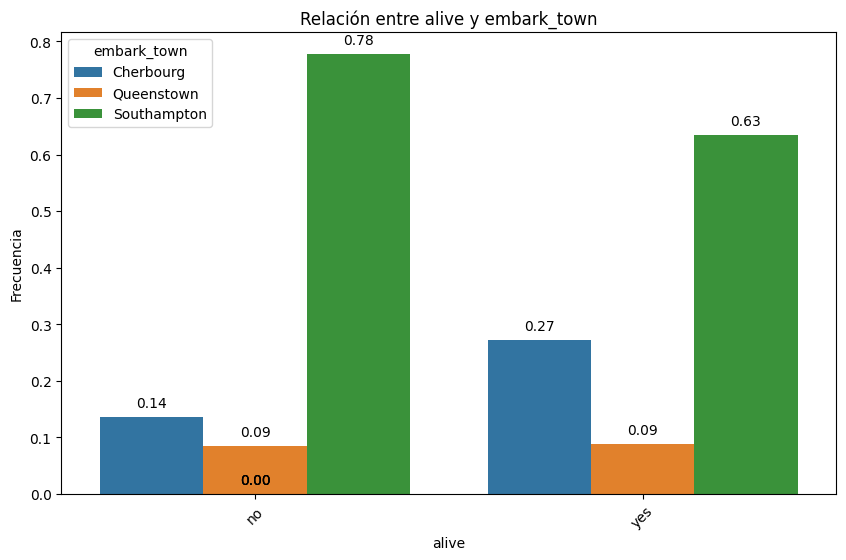

In [ ]:
#3
plot_categorical_relationship_fin(df_titanic,"alive","embark_town",relative_freq=True, show_values=True, size_group = 10)

Tiene sentido que tanto en porcentaje como en valor absoluto sobrevivieran mas personas Southampton. Ya que es dodne embarco la gran mayoria de gente y ya que el barco se undio despues de pasar por las 3 ciudades poco afecta donde se haya embarcado.

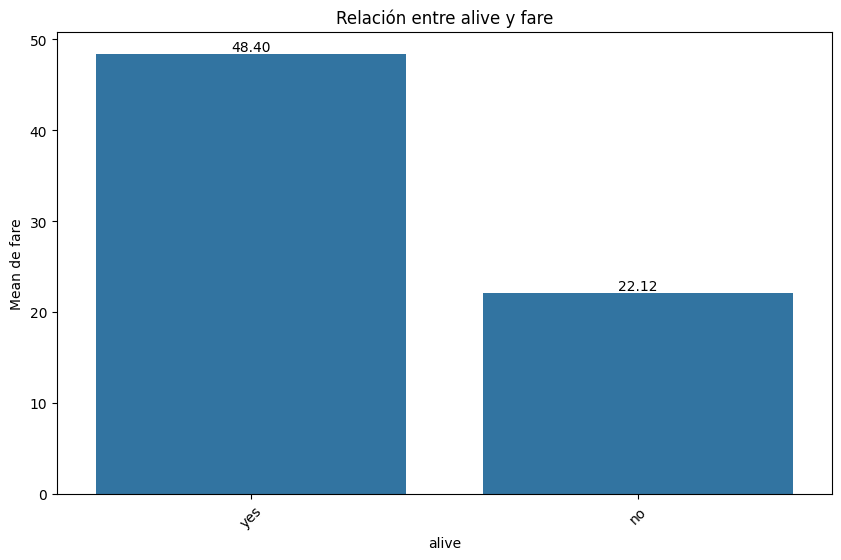

In [ ]:
#4
plot_categorical_numerical_relationship(df_titanic,"alive", "fare", show_values=True, measure='mean')

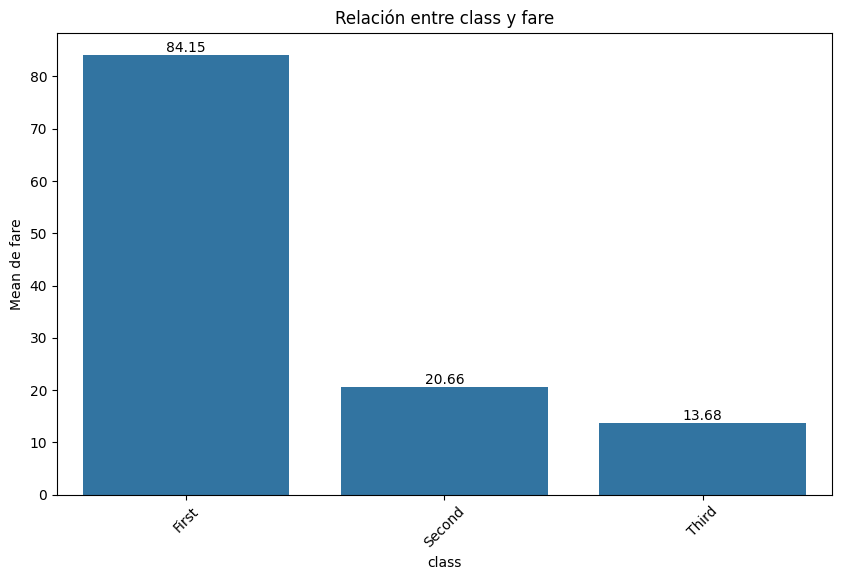

In [ ]:
plot_categorical_numerical_relationship(df_titanic,"class", "fare", show_values=True, measure='mean')

Como podemos ver aqui en los 2 graficos la media de muuertes por el precio de el pasaje esta justamente algo por debajo de la media del precio de segunda classe. Eso nos da mas indicios de que la gente de 1 y 2 segunda clase se salvo mucho mas.

In [ ]:
#5
#asajeros_0 = df_titanic["fare"].min()
#pasajeros_sin_pagar = (df_titanic["fare"] == pasajeros_0).sum()
#pasajeros_sin_pagar
max_fare = df_titanic["fare"].max()

df_max_fare = df_titanic.loc[df_titanic["fare"] == max_fare ]
df_max_fare

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,acompañantes_total
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


En principio hubo 15 personas que subieron sin pagar. Muy posiblemente fueran niños. Y de los que pagaron lo maximo por el pasaje sobrevivieron los 3.

In [ ]:
#6
fare_analysis = df_titanic.groupby(["embark_town", "alive"])["fare"].mean()
print(fare_analysis)


embark_town  alive
Cherbourg    no       35.443335
             yes      79.720926
Queenstown   no       13.335904
             yes      13.182227
Southampton  no       20.743987
             yes      39.547081
Name: fare, dtype: float64


Podemos apreciar que tanto en chesbourg como southampton las personas que pagaron mas por su pasaje sobrevivieron mas. Pero justamente en queestown no.

C:\Users\samas\AppData\Local\Temp\ipykernel_22492\936778192.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_titanic, x="class", y="alive", ci=None)


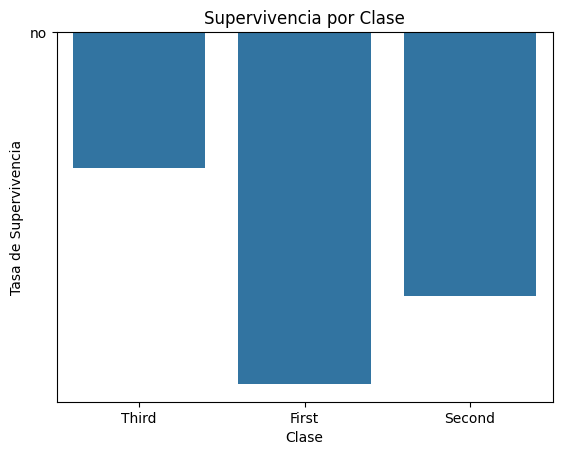

In [ ]:
#7
sns.barplot(data=df_titanic, x="class", y="alive", ci=None)
plt.title("Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Tasa de Supervivencia")
plt.show()


C:\Users\samas\AppData\Local\Temp\ipykernel_22492\1929502842.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_titanic, x="age", y="alive", ci=None)


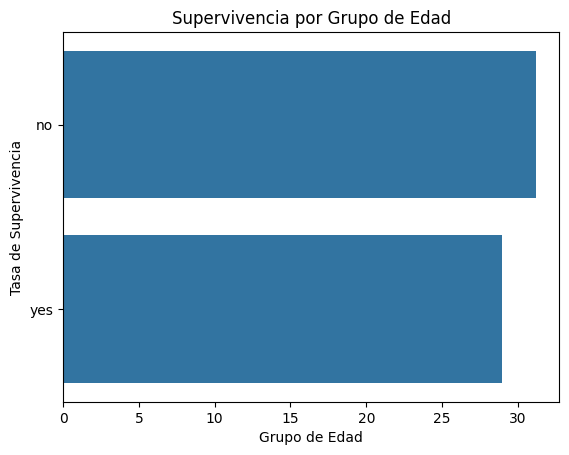

In [66]:
sns.barplot(data=df_titanic, x="age", y="alive", ci=None)
plt.title("Supervivencia por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Tasa de Supervivencia")
plt.show()

Respuesta no:


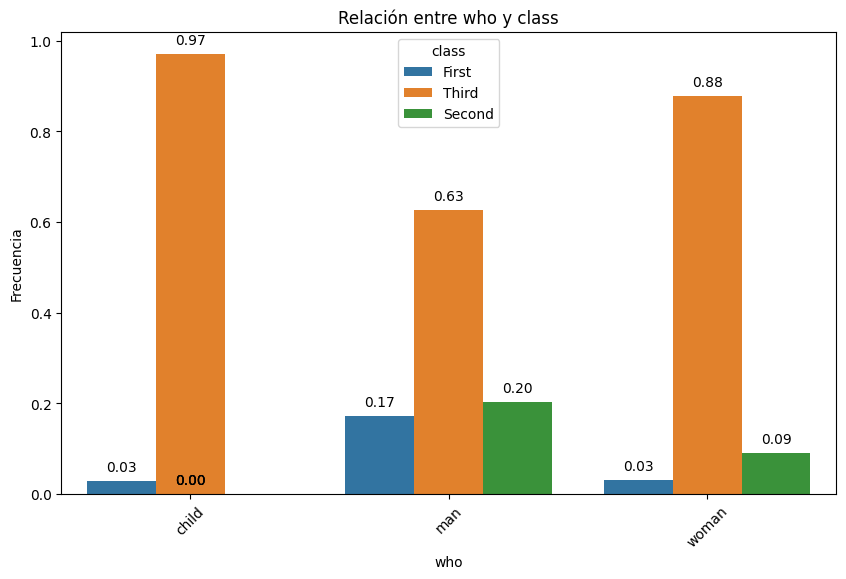

Respuesta yes:


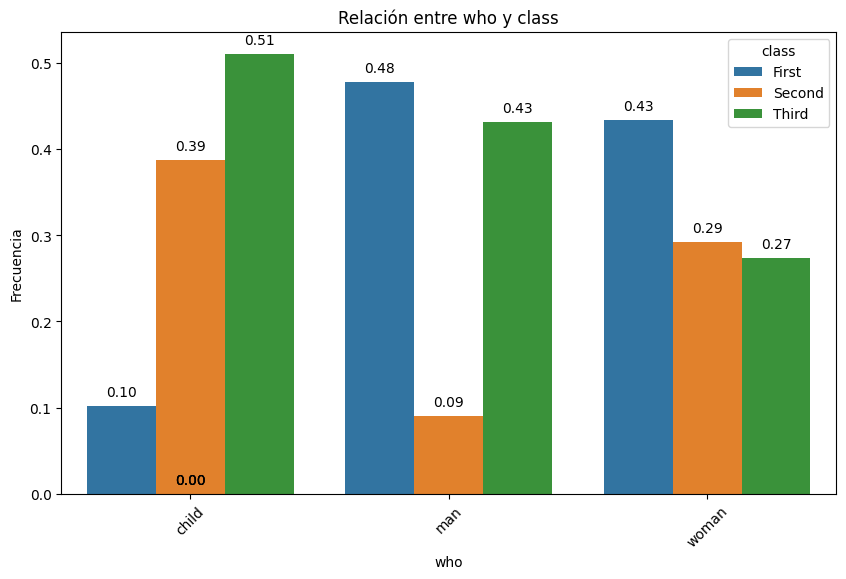

In [ ]:
columnas = ["who","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]
    
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    (df_datos, col_1, col_2 , relative_freq=True, show_values=True, size_group = 10)

si nos fijamos en la simple supervivencia los que mas sobrevivieron fueron los niños de tercera clase. Aunque todas las otras estadisticas anteriores apuntaran a lo contrario.

Respuesta no:


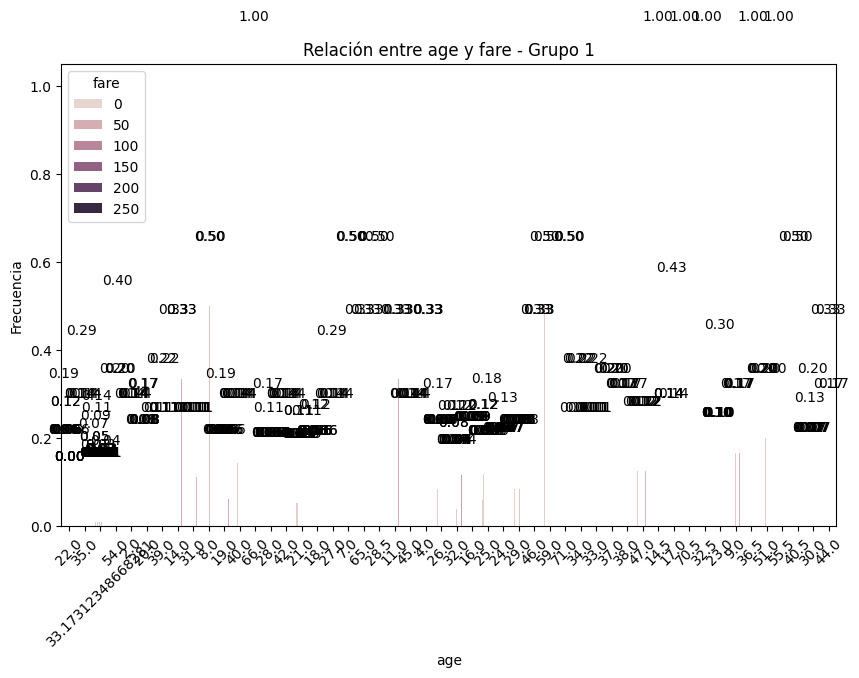

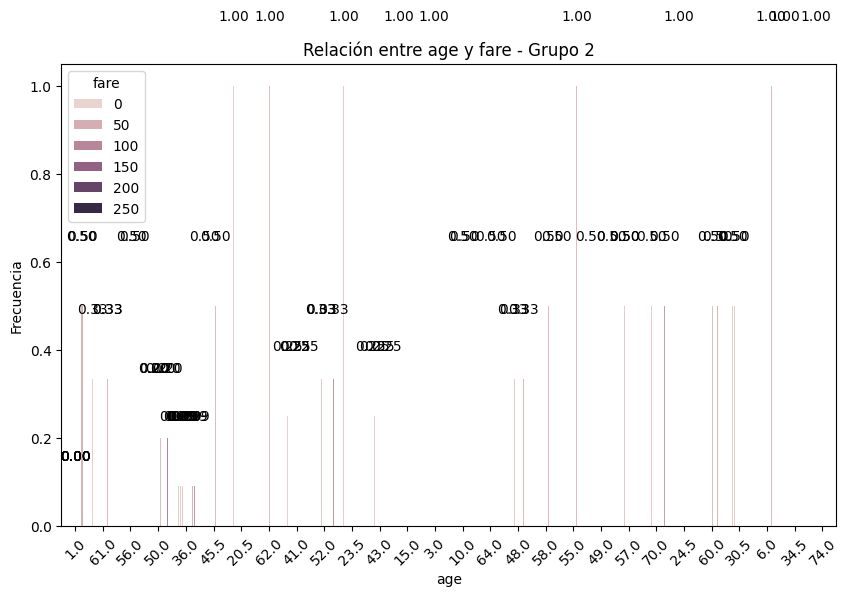

Respuesta yes:


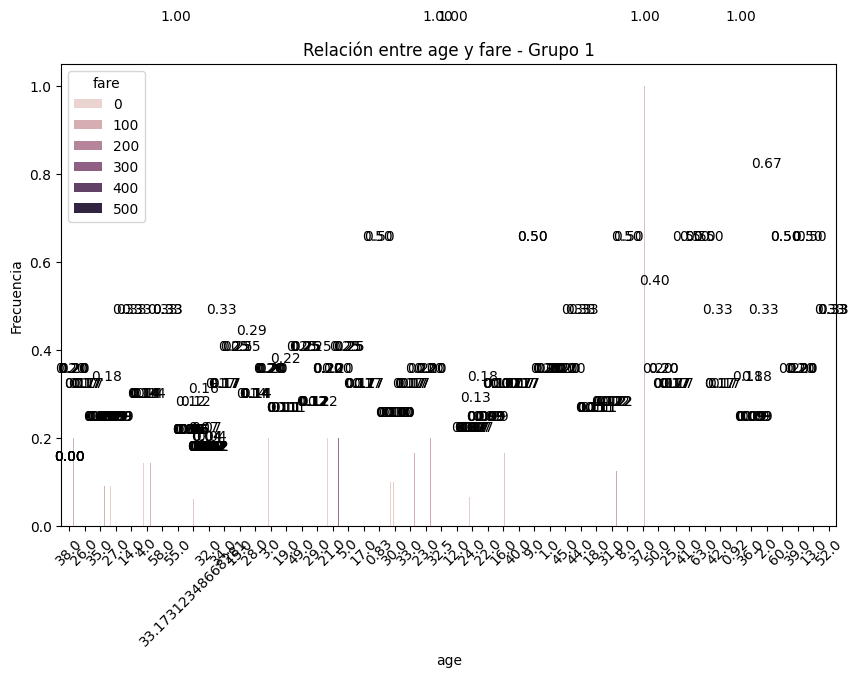

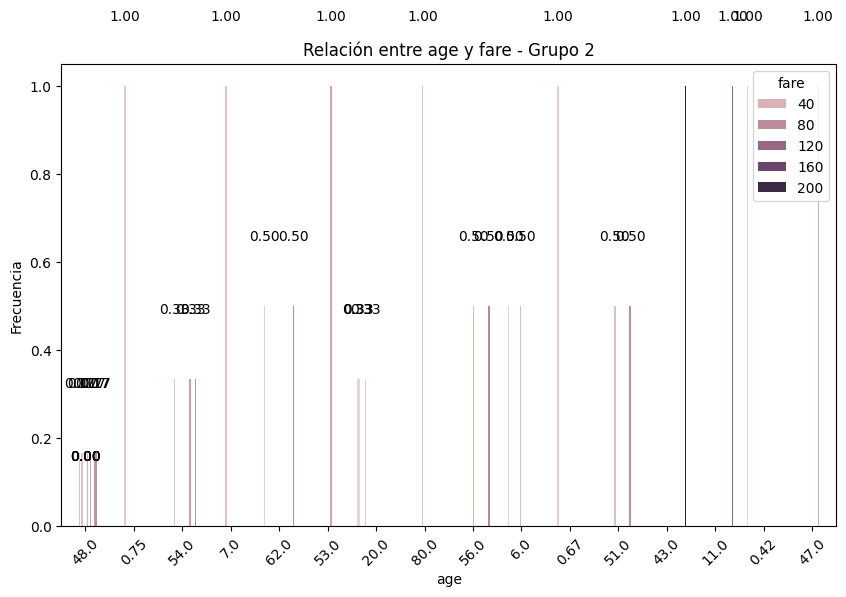

In [77]:
columnas = ["age","fare"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]
    
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos, col_1, col_2,relative_freq=True, show_values=True, size_group = 50 )

Aunque se aprecia algo mal estas graficas nos indican que para sobrevivir lo ideal seria tener 30 años y haver pago 200 por el billete.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.